# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# algoritmos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Preparacion de datos

In [70]:
#cargamos la base de datos y creamos el df

df = pd.read_csv(r"C:\Users\dario\Escritorio\CursoPython\Curso Machine Learning - Data\Día 11\Cuadernos para Prácticas\Ventas.csv")
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [4]:
df.describe()

,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365.000000,365.000000,365.000000,365.000000
mean,4.005479,0.200000,0.142466,2997.219178
std,2.002738,0.400549,0.350007,942.096284
min,1.000000,0.000000,0.000000,1305.000000
25%,2.000000,0.000000,0.000000,2195.000000
50%,4.000000,0.000000,0.000000,3074.000000
75%,6.000000,0.000000,0.000000,3979.000000
max,7.000000,1.000000,1.000000,4404.000000


In [93]:
df_agrupado_dias = df.groupby("DíaDeLaSemana")["Ventas"].sum()
df_agrupado_dias = pd.DataFrame(df_agrupado_dias)
df_agrupado_dias = df_agrupado_dias.reset_index()

df_agrupado_dias

,DíaDeLaSemana,Ventas
0,1,78125
1,2,109499
2,3,131295
3,4,159612
4,5,180998
5,6,215787
6,7,218669


# Análisis Exploratorio de Datos (EDA)

<Axes: xlabel='DíaDeLaSemana', ylabel='Ventas'>

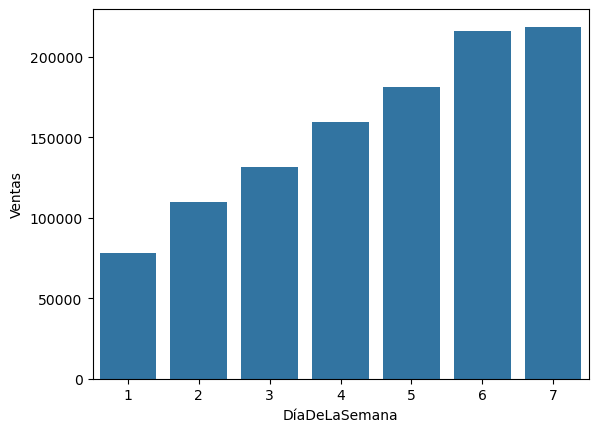

In [94]:
sns.barplot(df_agrupado_dias, x = "DíaDeLaSemana", y = "Ventas")

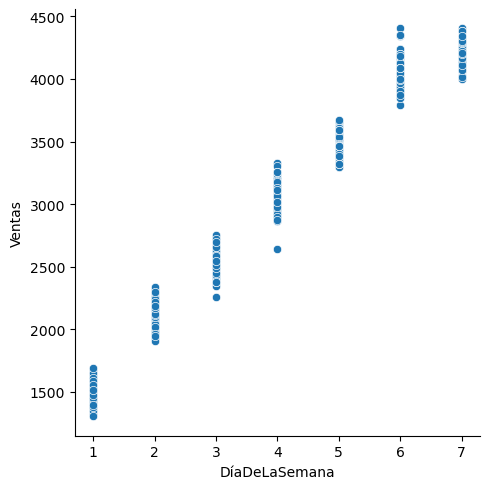

In [95]:
sns.relplot( data = df, x = df["DíaDeLaSemana"],
           y = df["Ventas"])
plt.show()

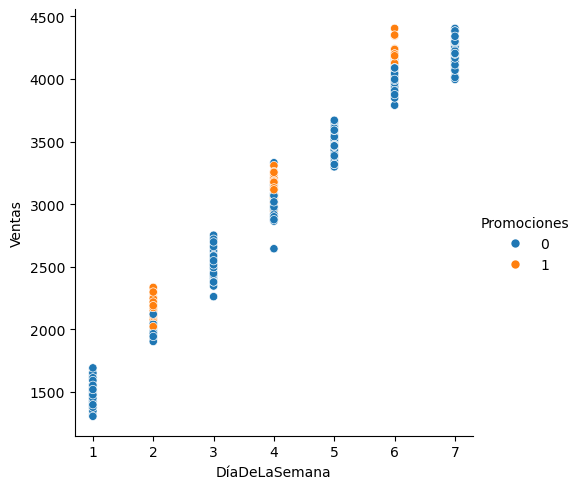

In [4]:
sns.relplot(data = df,
           x = "DíaDeLaSemana",
           y = "Ventas",
           hue = "Promociones")

<Axes: xlabel='DíaDeLaSemana', ylabel='Ventas'>

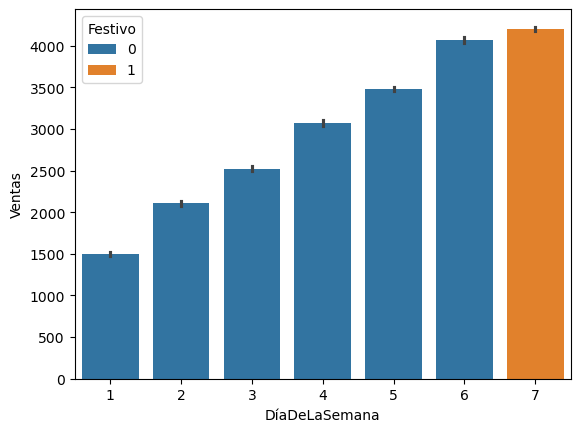

In [45]:
sns.barplot(data = df, x = "DíaDeLaSemana", y = "Ventas", hue = "Festivo")

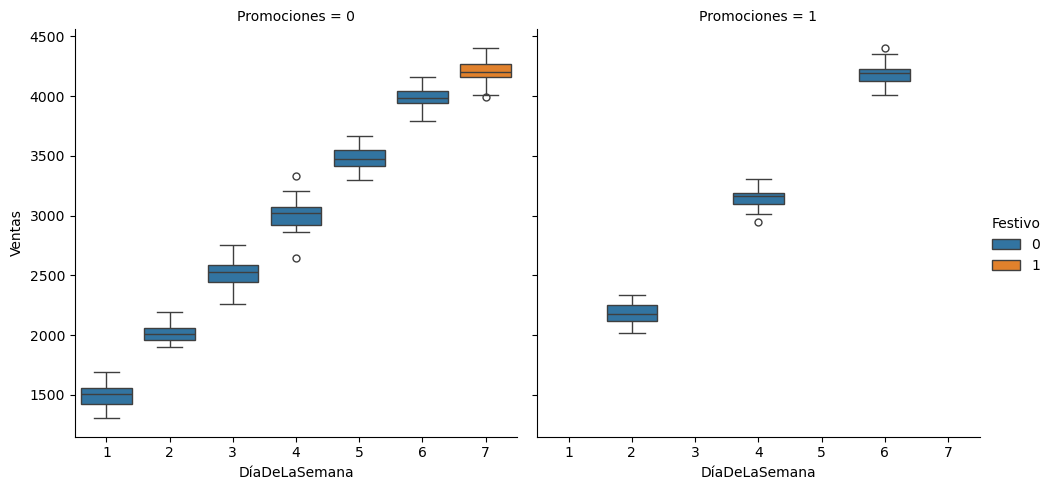

In [48]:
sns.catplot(data = df, x = "DíaDeLaSemana", y = "Ventas", kind = "box", col = "Promociones", hue = "Festivo")
#plt.ylim(0, 5000);

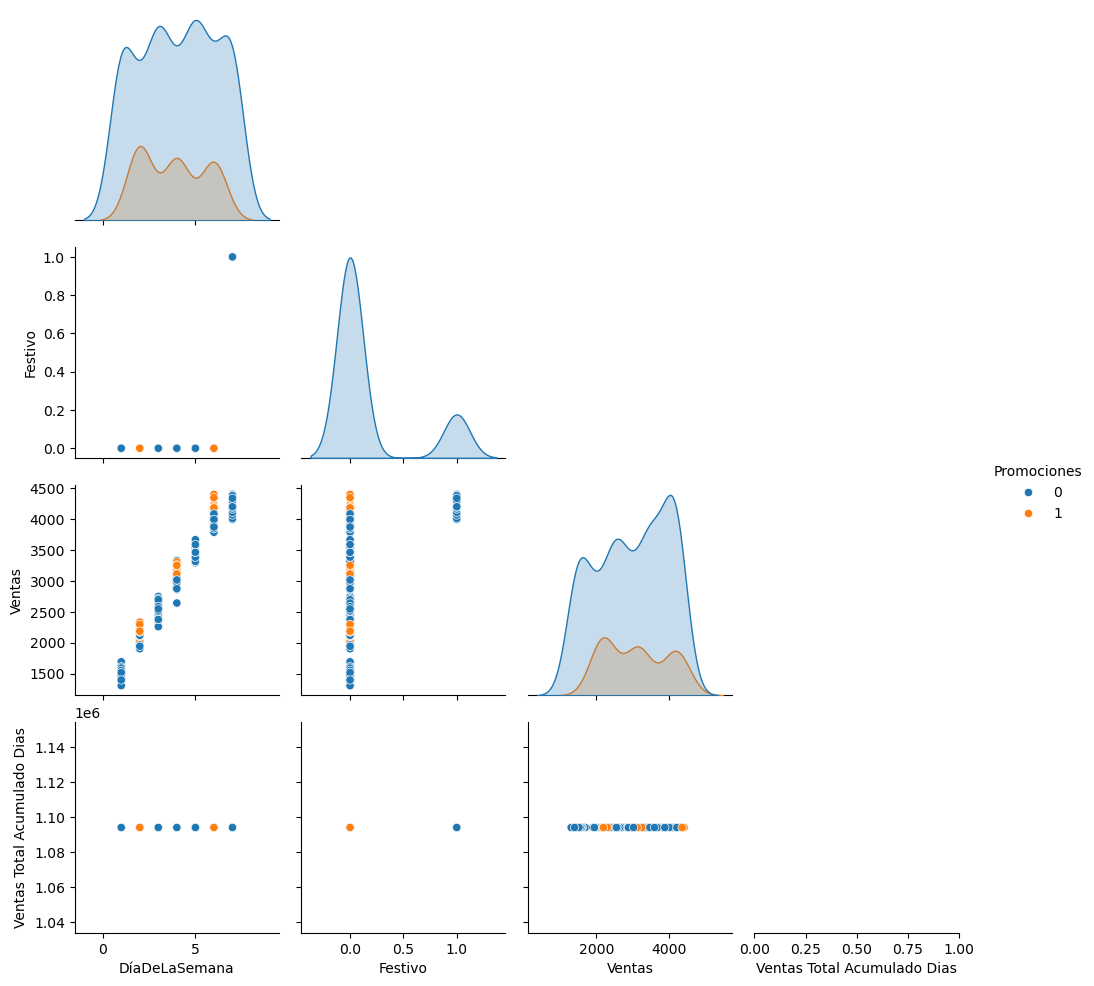

In [53]:
sns.pairplot(df, corner = True, hue = "Promociones")

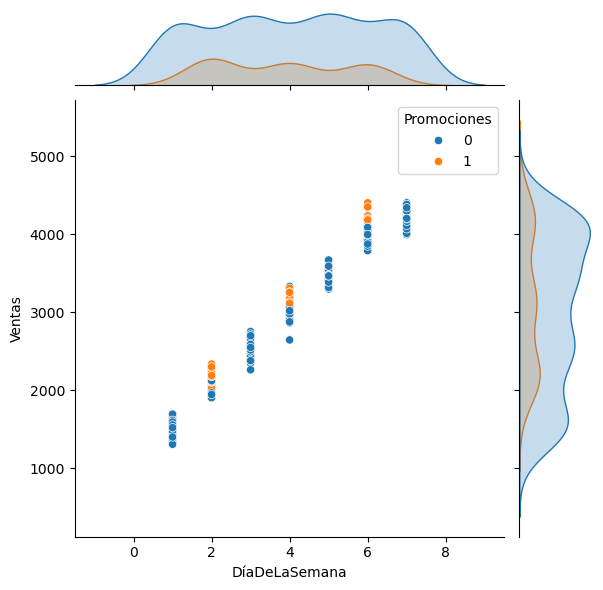

In [55]:
sns.jointplot(data = df, x = "DíaDeLaSemana", y = "Ventas", hue = "Promociones")

# 3. Selección de Modelo

In [71]:
df_sin_fecha = df.drop("Fecha", axis = 1)
df_sin_fecha

,DíaDeLaSemana,Promociones,Festivo,Ventas
0,6,0,0,4033
1,7,0,1,4012
2,1,0,0,1608
3,2,1,0,2046
4,3,0,0,2484
...,...,...,...,...
360,2,1,0,2189
361,3,0,0,2548
362,4,0,0,3018
363,5,0,0,3591


In [72]:
escala = MinMaxScaler(feature_range=(0,1))
normado = escala.fit_transform(df_sin_fecha)
df_normado = pd.DataFrame(data = normado, columns = df_sin_fecha.columns)
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas
0,0.833333,0.0,0.0,0.880284
1,1.000000,0.0,1.0,0.873508
2,0.000000,0.0,0.0,0.097773
3,0.166667,1.0,0.0,0.239109
4,0.333333,0.0,0.0,0.380445


In [98]:
X = df_agrupado_dias.drop("Ventas", axis = 1)
y = df_agrupado_dias["Ventas"]

In [105]:
regresion = linear_model.LinearRegression()
regresion.fit(X,y)



LinearRegression()

C:\Users\dario\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

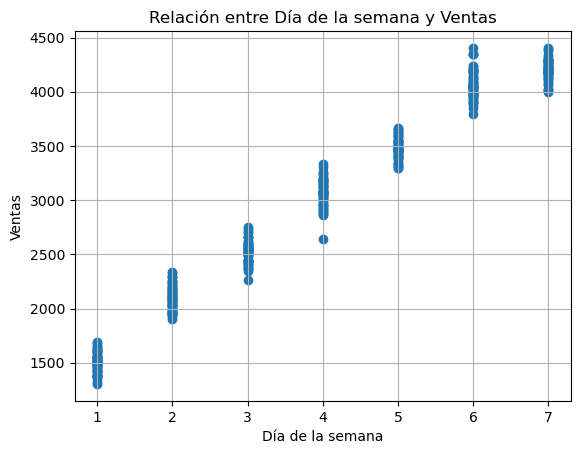

In [107]:
plt.scatter(df["DíaDeLaSemana"], df["Ventas"])

plt.title("Relación entre Día de la semana y Ventas")
plt.xlabel("Día de la semana")
plt.ylabel("Ventas")
plt.grid(True)

plt.plot(df["DíaDeLaSemana"], regresion.predict(df["DíaDeLaSemana"]));

In [84]:
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f" {modelo}, {puntaje:.}) 

 LinearRegression(), 0.990311


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.